In [216]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [236]:
# char_density = '$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`. '
char_density = '$@%#WMo- '
char_density = list(char_density)
char_height = 18
char_width = 8
ratio = char_width/char_height

In [245]:
img = Image.open('/content/rsz_img_20190203_131621.jpg')
factor = 0.3
w,h = img.size
img_rs = img.resize((int(factor*w*ratio),int(factor*h*ratio)),Image.NEAREST)
img_rs = np.array(img_rs)
w_rs,h_rs,c_rs = img_rs.shape

In [246]:
luminance_factor = [0.2,0.4,0.4]
gray = np.dot(img_rs[...,:3],luminance_factor)#changing into gray scale

In [247]:
w,h

(781, 945)

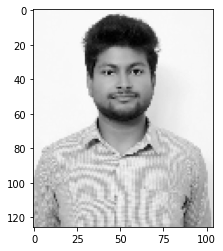

In [248]:
plt.imshow(gray,cmap='gray')

In [184]:
# text_file = open("output.txt","w")

In [249]:
def select_char(char_density,intensity):
  char_length = len(char_density)
  interval = char_length/256
  return char_density[int(np.floor(intensity*interval))]#function to choose from the character density.

In [250]:
opt_img = Image.new('RGB',(char_width*w_rs,char_height*h_rs),color = (0,0,0))
fnt = ImageFont.truetype('/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',15)
draw = ImageDraw.Draw(opt_img)

In [251]:
for i in range(h_rs):
  for j in range(w_rs):
    r,g,b = img_rs[j,i]
    # text_file.write(select_char(char_density,int(gray[j,i])))
    draw.text((j*char_width,i*char_height),select_char(char_density,int(gray[j,i])),font=fnt,fill=(r,g,b))
  # text_file.write('\n')


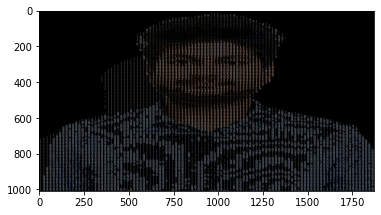

In [252]:
# opt_img = np.array(opt_img)
# opt_img = np.transpose(opt_img)
plt.imshow(opt_img.rotate(-90,Image.NEAREST, expand = 1))

In [253]:
opt_img = opt_img.rotate(-90,Image.NEAREST, expand = 1)
opt_img.save("output.png")